# Making Predictions with the Wisconsin Breast Cancer Dataset

#### By: James Gallmeister

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

Load in the Dataset into a pandas dataframe.

In [37]:
df = pd.read_csv('data/data.csv', header=0)
df.info()
df.head()
print("\n\tThe dataset has {0[0]} rows and {0[1]} columns".format(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

The dataset has an extra column at the end, so lets get rid of it.

In [38]:
df = df.dropna(axis=1, how='all')
#df.info()

print('\n\t The data has {0[0]} malignant diagnosis\' and {0[1]} benign diagnosis\'.'.format(list(df['diagnosis'].value_counts())))


	 The data has 357 malignant diagnosis' and 212 benign diagnosis'.


For this analysis, it will be best for us to look at the mean values in the dataset, represented in rows 1-11. So let's extract the columns.

In [39]:
features = list(df.columns[2:12])
print(features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


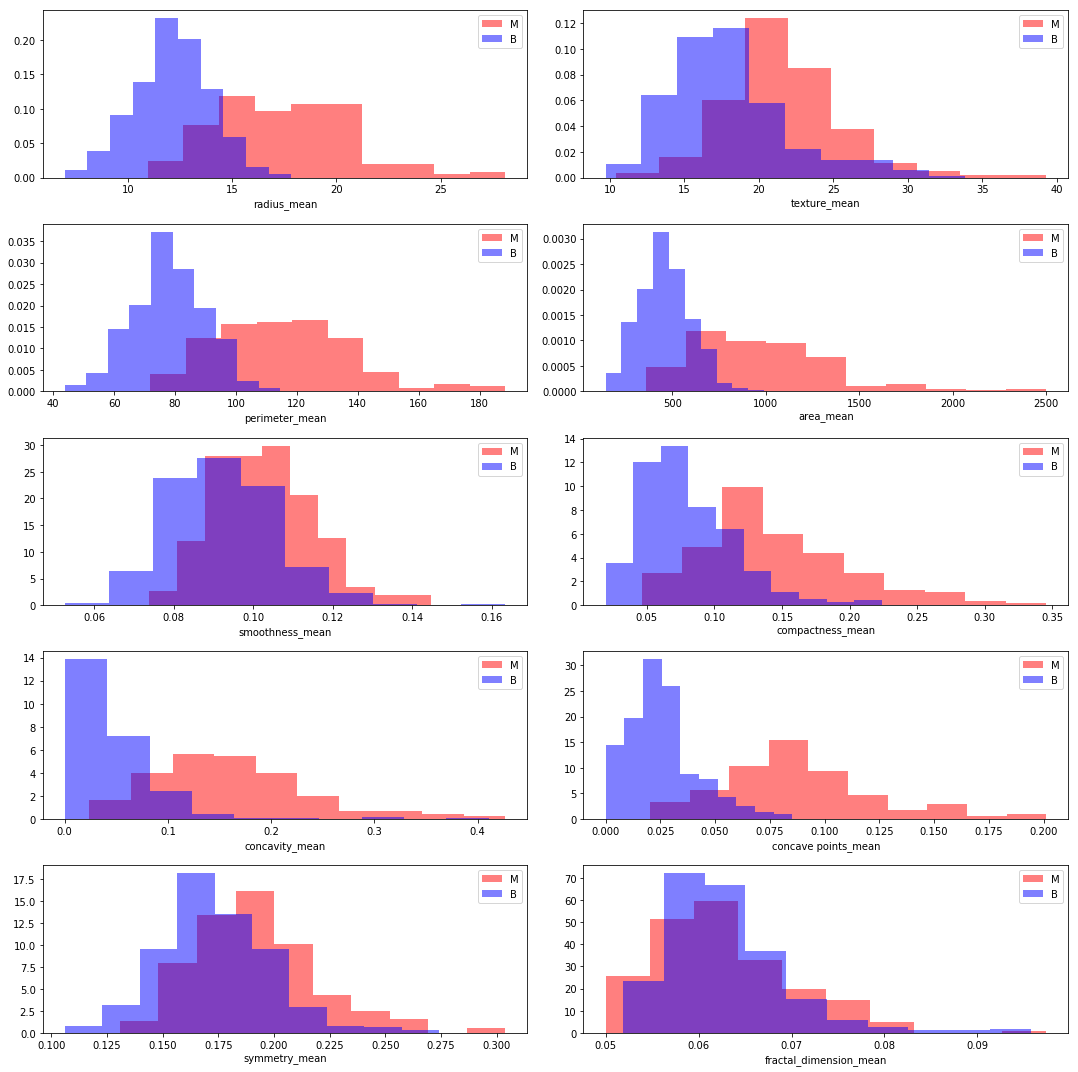

In [40]:
rows = int(len(features) / 2)
fig = plt.figure(figsize=(15,15))

for idx, feat in enumerate(features):
    ax = plt.subplot(rows, 2, idx+1)
    _ = ax.hist(df[df['diagnosis'] == 'M'][feat], color='red', alpha=0.5, density=True, label='M')
    _ = ax.hist(df[df['diagnosis'] == 'B'][feat], color='blue', alpha=0.5, density=True, label='B')
    _ = ax.legend(loc='upper right')
    _ = ax.set_xlabel(feat)
plt.tight_layout()
plt.show()

As can be seen by the plots above, most of the features of the tumors are separable with the exception of a few such as `fractal_dimension_mean` and `smoothness_mean`.

We can use the seaborn heatmap to see the correlation between the chosen features from above.

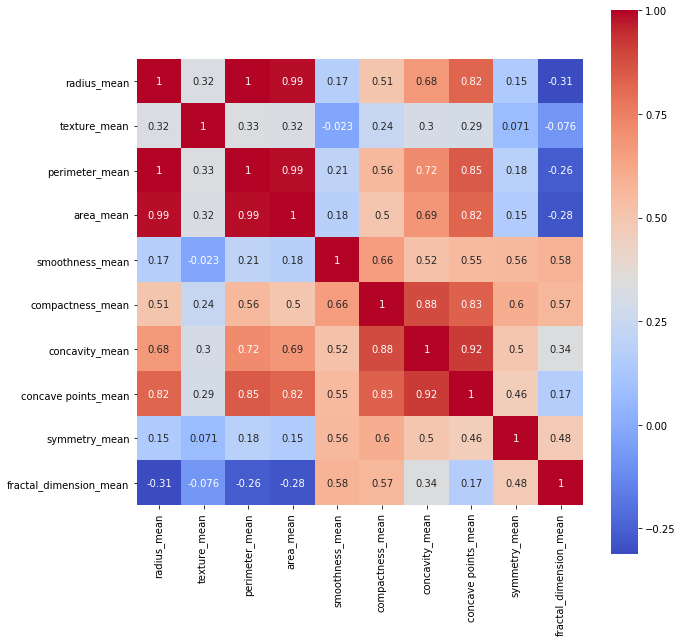

In [41]:
fig = plt.figure(figsize=(10,10))
_ = sns.heatmap(df[features].corr(), cmap='coolwarm', square=True, annot=True)
plt.show()

## Machine Learning

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

For this section we will be implementing multiple machine learning algorithms and will then refine those initial algorithms that yield the best results.

In [43]:
diag = {'B':0, 'M':1}
df = df.replace(diag)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now we will select the features from the graphs above to do learning on those before we refine our feature selection later on.

In [44]:
df_clean = df.loc[:,features]
df_clean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Preprocessing
We need to split the above data into vectors to do learning on so we will do that through the `train_test_split` function in sklearn with 33% of data being used for testing. We will then use the Standard Scaler to normalize our data to fit a Gaussian distribution.

In [64]:
from sklearn.preprocessing import StandardScaler

x = df_clean.iloc[0:,1:].values
y = df.iloc[0:,1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=123)

print("---Training Data---")
print("Before")
print("\tMean: {0:.4f}\n\tStandard Deviation: {1:.2f}".format(np.mean(x_train), np.std(x_train)))
x_train = StandardScaler().fit_transform(x_train)
print("After")
print("\tMean: {0:.4f}\n\tStandard Deviation: {1:.2f}\n\n".format(-1*np.mean(x_train), np.std(x_train)))

print("---Test Data---")
print("Before")
print("\tMean: {0:.4f}\n\tStandard Deviation: {1:.2f}".format(np.mean(x_test), np.std(x_test)))
x_test = StandardScaler().fit_transform(x_test)
print("After")
print("\tMean: {0:.4f}\n\tStandard Deviation: {1:.2f}".format(-1*np.mean(x_test), np.std(x_test)))

---Training Data---
Before
	Mean: 84.8385
	Standard Deviation: 232.28
After
	Mean: 0.0000
	Standard Deviation: 1.00


---Test Data---
Before
	Mean: 85.9091
	Standard Deviation: 240.14
After
	Mean: 0.0000
	Standard Deviation: 1.00


As you can see from the outputs above, we have transformed our data to fit a normal distribution with mean 0 and standard deviation 1.

### Stochastic Gradient Descent
We will use two different values for the loss hyperparameter: `perceptron` and `log`.

In [69]:
from sklearn.linear_model import SGDClassifier

start = time.time()
clf = SGDClassifier(loss='perceptron', max_iter = 1500, tol=1e-3).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=3)
end = time.time()

print("Perceptron Classifier Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))


start = time.time()
clf = SGDClassifier(loss='log', max_iter = 1500, tol=1e-3).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=3)
end = time.time()

print("\nLogistic Regression Classifier Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))

Perceptron Classifier Accuracy: 94.68%
Cross Validation Score: 60.99% (+/- 4.90%)
Executed in 0.010 seconds

Logistic Regression Classifier Accuracy: 94.15%
Cross Validation Score: 75.92% (+/- 10.54%)
Executed in 0.013 seconds


### Support Vector Machines
For this learning we will implement two different SVM classifiers 

In [73]:
from sklearn.svm import SVC, LinearSVC

start = time.time()
clf = SVC(gamma='auto', max_iter=1500, tol=1e3).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=4)
end = time.time()

print("SVC Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross-Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))


start = time.time()
clf = LinearSVC(max_iter=1500, tol=1e3).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=4)
end = time.time()

print("\nLinear SVC Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross-Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))

SVC Accuracy: 39.89%
Cross-Validation Score: 37.26% (+/- 0.11%)
Executed in 0.010 seconds

Linear SVC Accuracy: 93.09%
Cross-Validation Score: 54.82% (+/- 8.18%)
Executed in 0.009 seconds


## Random Forest Classifier
We will use a decision tree classifier and then a random forest classifier.

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

start = time.time()
clf = DecisionTreeClassifier().fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=4)
end = time.time()

print("Decision Tree Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross-Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))

start = time.time()
clf = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=4)
end = time.time()

print("\nRandom Forest Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross-Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))

Decision Tree Accuracy: 90.96%
Cross-Validation Score: 92.62% (+/- 1.03%)
Executed in 0.017 seconds

Random Forest Accuracy: 94.68%
Cross-Validation Score: 94.56% (+/- 2.58%)
Executed in 0.516 seconds


## Multi-Layer Perceptron Classifier
We will implement a linear perceptron and a multi-layer perceptron model.

In [80]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

start = time.time()
clf = Perceptron(max_iter=1000, tol=1e-3).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=4)
end = time.time()

print("Linear Perceptron Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross-Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))

start = time.time()
clf = MLPClassifier(max_iter=1000).fit(x_train, y_train)
predict = clf.predict(x_test)
scores = cross_val_score(clf, x, y, cv=4)
end = time.time()

print("\nMulti-Layer Perceptron Accuracy: {0:.2%}".format(accuracy_score(predict, y_test)))
print("Cross-Validation Score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)))
print("Executed in {0:.3f} seconds".format(end-start))

Linear Perceptron Accuracy: 93.62%
Cross-Validation Score: 83.31% (+/- 2.76%)
Executed in 0.011 seconds

Multi-Layer Perceptron Accuracy: 96.28%
Cross-Validation Score: 85.77% (+/- 0.72%)
Executed in 1.204 seconds
